In [3]:
using ControlSystems;
using DifferentialEquations;
using PyPlot;
using Polynomials;

First, define the $\left(A,B,C,D \right)$  matrices for the system.<br>
You can perform analysis.<br>
stability<br>
controllability<br>
observability<br>

In [38]:

A=[-2 1 0; 0 -2 0;0 0 4];
B=[0;1;1];
C=[1.0 0 0; 0 0 1];
D=0.0;
sys=ss(A,B,C,D,0);

In [39]:
B

3-element Array{Int64,1}:
 0
 1
 1

In [40]:
eigvals(A)

3-element Array{Float64,1}:
 -2.0
 -2.0
  4.0

In [41]:
rank(ctrb(sys))

3

In [42]:
rank(obsv(sys))

3

In [43]:
u(x,t)=[0.0 0.0 0.0]*x;
x0=[1;0.5;0.25];
tspan=0:0.01:2;
y, t, x, uout = lsim(sys,u,tspan,x0=x0);

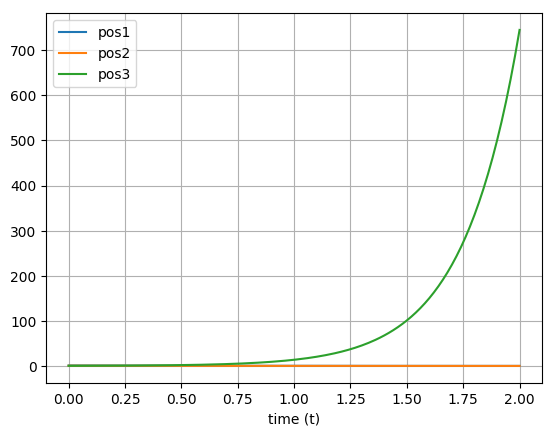

In [44]:
#system without feedback controller
plot(t,x[:,1],label="pos1")
plot(t,x[:,2],label="pos2")
plot(t,x[:,3],label="pos3")
xlabel("time (t)")
legend()
grid(true)

In [24]:
K = [0.0 -0.33333333 9.333333333]

1×3 Array{Float64,2}:
 0.0  -0.333333  9.33333

In [25]:
sys_new= A-B*K

3×3 Array{Float64,2}:
 -2.0   1.0        0.0    
  0.0  -1.66667   -9.33333
  0.0   0.333333  -5.33333

In [26]:
eigvals(sys_new)

3-element Array{Float64,1}:
 -2.0
 -3.0
 -4.0

# Now, apply the control and perform simulation

In [27]:
#Question4 system plot with controller
u(x,t)=-K*x;
y, t, x, uout = lsim(sys,u,tspan,x0=x0);

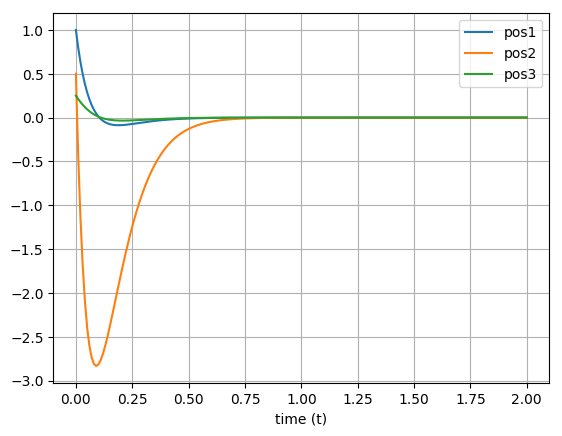

In [28]:
#system with feedback controller

plot(t,x[:,1],label="pos1")
plot(t,x[:,2],label="pos2")
plot(t,x[:,3],label="pos3")
xlabel("time (t)")
legend()
grid(true)

In [29]:
rank(obsv(sys.A,C))

3

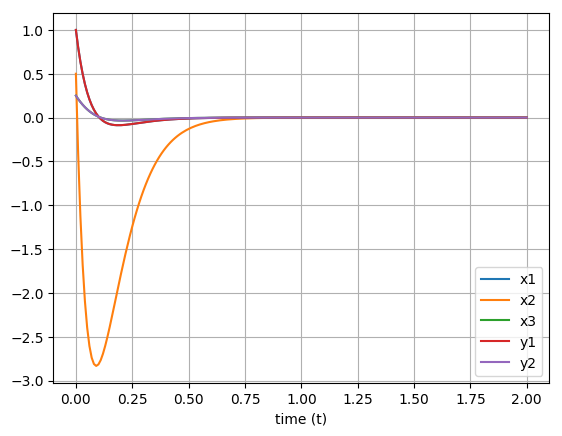

In [30]:
#system with feedback estimator

L=[20 0; 99 0;0 11];
A1 = A-L*C;
sys = ss(A1,B,C,D)
y0 = [0.3 ; 0.9]
y, t, x, uout = lsim(sys,u,tspan,x0=x0)
plot(t,x[:,1],label="x1")
plot(t,x[:,2],label="x2")
plot(t,x[:,3],label="x3")
plot(t,y[:,1],label="y1")
plot(t,y[:,2],label="y2")
xlabel("time (t)")
legend()
grid(true)

In [31]:



L=[24 0; 140 0;0 12];

eigvals(A-L*C)
Ace = [(A-B*K) (B*K);
       zeros(size(A)) (A-L*C)];
Bce = [B;
       zeros(size(B))];
Cce = [C zeros(size(C))];
Dce = [0;0];
sys = ss(Ace,Bce,Cce,Dce)

ControlSystems.StateSpace{Float64,Array{Float64,2}}
A = 
 -2.0   1.0        0.0         0.0   0.0        0.0    
  0.0  -1.66667   -9.33333     0.0  -0.333333   9.33333
  0.0   0.333333  -5.33333     0.0  -0.333333   9.33333
  0.0   0.0        0.0       -26.0   1.0        0.0    
  0.0   0.0        0.0      -140.0  -2.0        0.0    
  0.0   0.0        0.0         0.0   0.0       -8.0    
B = 
 0.0
 1.0
 1.0
 0.0
 0.0
 0.0
C = 
 1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0
D = 
 0.0
 0.0

Continuous-time state-space model

In [36]:
u(x,t)=[0.0 0.0 0.0 0.0 0.0 0.0]*x;
x0=[1;0.5;0.25;0.6; 1.1 ; 0.8];
tspan=0:0.01:3;
y1, t, x1, uout = lsim(sys,u,tspan,x0=x0)

([1.0 0.25; 0.985329 0.306277; … ; -0.00722701 -0.000203156; -0.00709864 -0.000197435], 0.0:0.01:3.0, [1.0 0.5 … 1.1 0.8; 0.985329 0.534768 … 0.340889 0.738493; … ; -0.00722701 -0.00151006 … 8.96464e-9 1.0186e-10; -0.00709864 -0.00146657 … 7.63159e-9 9.40285e-11], [0.0; 0.0; … ; 0.0; 0.0])

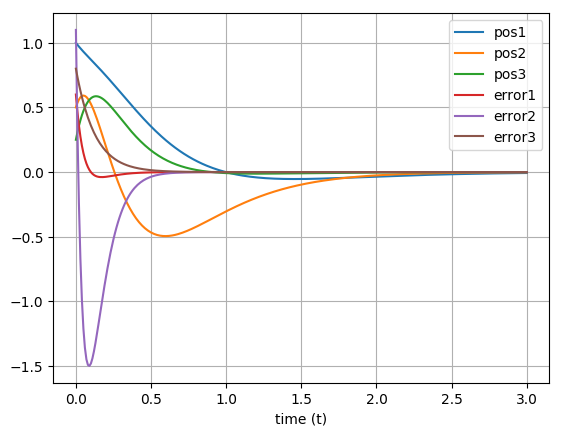

In [37]:
# system with Feedback estimator and control
plot(t,x1[:,1],label="pos1")
plot(t,x1[:,2],label="pos2")
plot(t,x1[:,3],label="pos3")
plot(t,x1[:,4],label="error1")
plot(t,x1[:,5],label="error2")
plot(t,x1[:,6],label="error3")
xlabel("time (t)")
legend()
grid(true)

In [3]:
#Develoing a reduced order observer for state X2


Att = [-3 1;0 -14];
Btt = [1;0];
Ctt = [1 0];
Dtt = [0]
sys_15 = ss(Att,Btt,Ctt,Dtt)

ControlSystems.StateSpace{Int64,Array{Int64,2}}
A = 
 -3    1
  0  -14
B = 
 1
 0
C = 
 1  0
D = 
 0

Continuous-time state-space model

In [5]:
u(x,t)=[0.0 0.0]*x;
x0=[1;0.5];
tspan=0:0.01:10;
y2, t, x2, uout = lsim(sys_15,u,tspan,x0=x0)

([1.0; 0.975041; … ; -8.49918e-9; -7.93075e-9], 0.0:0.01:10.0, [1.0 0.5; 0.975041 0.434674; … ; -8.49918e-9 9.3492e-8; -7.93075e-9 8.72394e-8], [0.0; 0.0; … ; 0.0; 0.0])

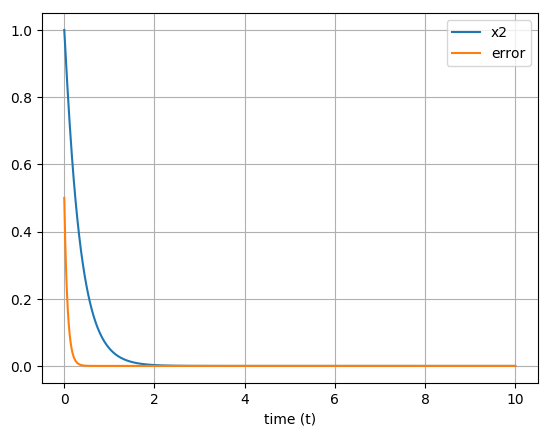

In [7]:

plot(t,x2[:,1],label="x2")
plot(t,x2[:,2],label="error")
xlabel("time (t)")
legend()
grid(true)